In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import MaxPooling2D
sns.set()

In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *

train_values = np.empty(shape=[0, 189])
test_values = np.empty(shape=[0, 189])

train_sampled_all = glob.glob('./drive/MyDrive/compsci/train_sampled_all.csv')
# test_all = glob.glob('./drive/MyDrive/compsci/test_all.csv')
test_sampled_all = glob.glob('./drive/MyDrive/compsci/test_sampled_all.csv')

for j in train_sampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    train_values = np.append(train_values, csvrows, axis=0)
    
# for j in test_all:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     test_values = np.append(test_values, csvrows, axis=0)

for j in test_sampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    test_values = np.append(test_values, csvrows, axis=0)
    
print(train_values.shape)
print(test_values.shape)

Loading  ./drive/MyDrive/compsci/train_sampled_all.csv
Loading  ./drive/MyDrive/compsci/test_sampled_all.csv
(30936, 189)
(10152, 189)


In [3]:
X_train = train_values[:,:-2]
X_test = test_values[:,:-2]

y_train = train_values[:,-2]
y_test = test_values[:,-2]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30936, 187)
(10152, 187)
(30936,)
(10152,)


In [4]:
# X_train = X_train.reshape(-1, X_train.shape[1],1)
# X_test = X_test.reshape(-1, X_test.shape[1],1)

X_train1 = X_train.reshape(X_train.shape + (1,1,))
X_test1 = X_test.reshape(X_test.shape + (1,1,))
print(X_train1.shape)
print(X_test1.shape)

y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(9-1)
y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(9-1)
print(y_train.shape)
print(y_test.shape)

y_train1=to_categorical(y_train)
y_test1=to_categorical(y_test)
print(y_train1.shape)
print(y_test1.shape)

(30936, 187, 1, 1)
(10152, 187, 1, 1)
(30936,)
(10152,)
(30936, 9)
(10152, 9)


In [5]:
def showResults(test, pred):
    #target_names = ['positive', 'negative']
    # print(classification_report(test, pred, target_names=target_names))
    accuracy = accuracy_score(test, pred)
    precision=precision_score(test, pred, average='weighted')
    f1Score=f1_score(test, pred, average='weighted') 
    #loss=log_loss(test,pred)
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    #print("Loss : {}".format(loss))
    cm=confusion_matrix(test, pred)
    print(cm)
    return cm

In [6]:
# import tensorflow as tf
# tf.compat.v1.disable_eager_execution()

# verbose, epoch, batch_size = 1, 1, 32
# activationFunction='relu'

# def getModel():
    
#     cnnmodel = Sequential()
#     cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train1.shape[1],1)))
#     # cnnmodel.add(Input(shape=()))
#     # cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
#     cnnmodel.add(MaxPooling1D(pool_size=2))
#     cnnmodel.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
#     cnnmodel.add(MaxPooling1D(pool_size=2))
#     cnnmodel.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
#     cnnmodel.add(MaxPooling1D(pool_size=2))
#     cnnmodel.add(Conv1D(filters=16, kernel_size=2, activation='relu'))
#     cnnmodel.add(MaxPooling1D(pool_size=2))
#     cnnmodel.add(Conv1D(filters=9, kernel_size=2, activation='relu'))
#     cnnmodel.add(MaxPooling1D(pool_size=2))
#     cnnmodel.add(Dropout(rate=0.2))
#     cnnmodel.add(Flatten())
#     cnnmodel.add(Dense(64, activation='relu'))
#     cnnmodel.add(Dense(32, activation='relu'))
#     cnnmodel.add(Dense(9, activation='softmax'))
#     cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#     cnnmodel.summary()
#     return cnnmodel

# cnnmodel = getModel()

In [7]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

verbose, epoch, batch_size = 1, 1, 32
activationFunction='relu'

def getModel():
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=1, activation='relu',input_shape=(X_train1.shape[1],1)))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=32, kernel_size=1, activation='relu'))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=16, kernel_size=1, activation='relu'))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=9, kernel_size=1, activation='relu'))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(64, activation='relu'))
    cnnmodel.add(Dense(32, activation='relu'))
    cnnmodel.add(Dense(9, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = getModel()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 187, 128)          256       
_________________________________________________________________
batch_normalization (BatchNo (None, 187, 128)          512       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 187, 64)           8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 187, 64)           256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 187, 32)           2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 187, 32)           128       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 187, 16)           5

In [8]:
modelhistory= cnnmodel.fit(X_train1[:,:,:,0], y_train1, epochs=epoch, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Train on 24748 samples, validate on 6188 samples
24748/24748 [==============================] - ETA: 0s - loss: 0.5312 - accuracy: 0.8224

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


24748/24748 [==============================] - 39s 2ms/sample - loss: 0.5312 - accuracy: 0.8224 - val_loss: 0.2819 - val_accuracy: 0.9116


<function matplotlib.pyplot.show>

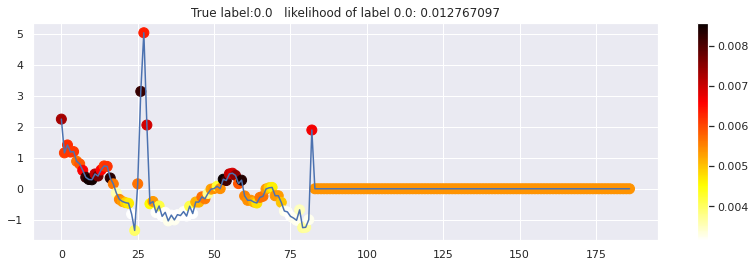

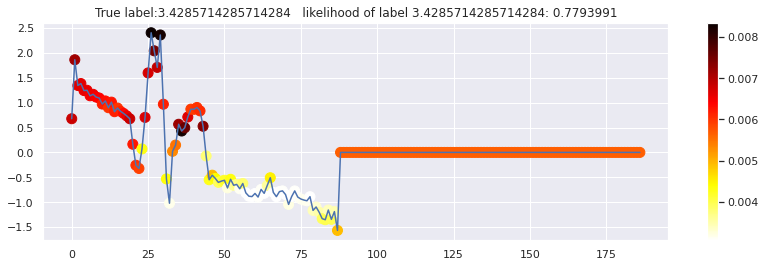

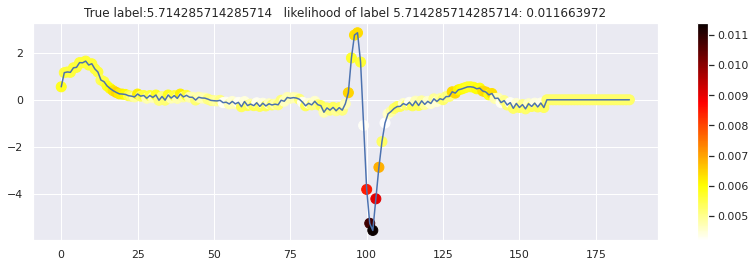

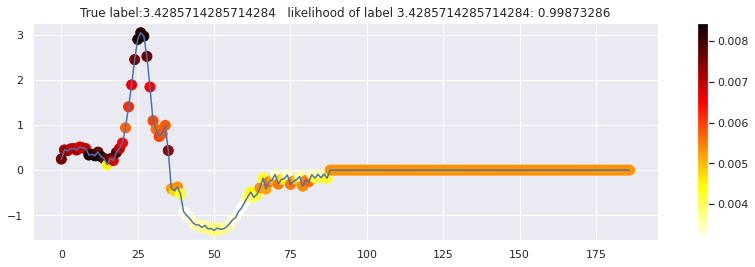

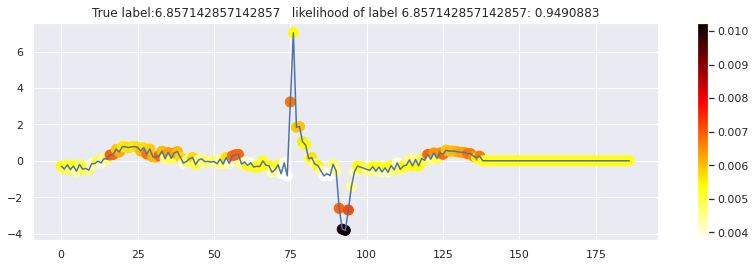

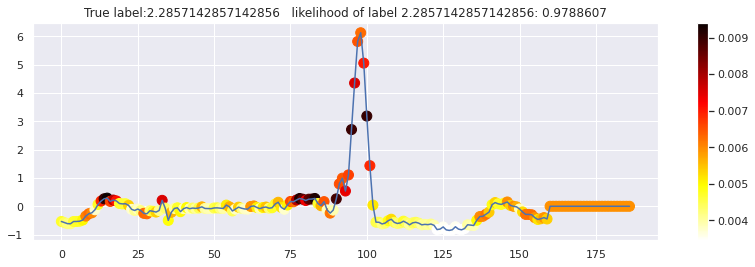

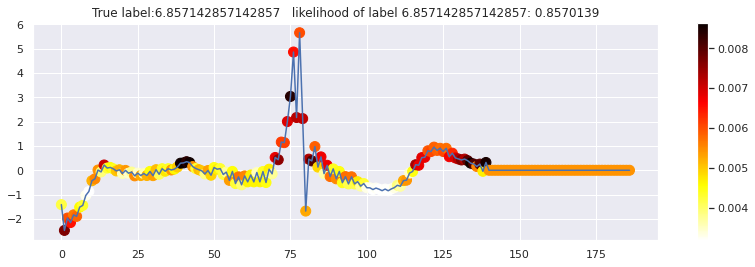

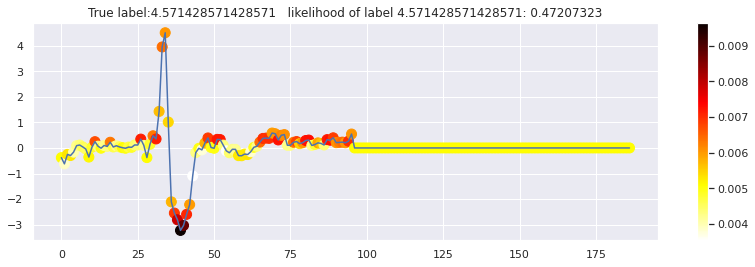

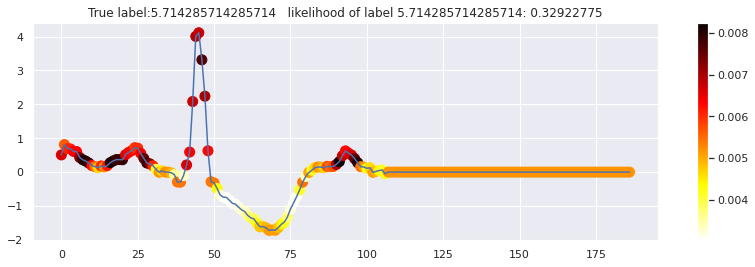

In [18]:
############## Get CAM ################
import matplotlib.pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages

get_last_conv1 = keras.backend.function([cnnmodel.layers[0].input, keras.backend.learning_phase()], [cnnmodel.layers[8].output])
last_conv1 = get_last_conv1([X_test1[:100,:,:,0]])[0]

get_softmax1 = keras.backend.function([cnnmodel.layers[0].input, keras.backend.learning_phase()], [cnnmodel.layers[-1].output])
softmax1 = get_softmax1(([X_test1[:100,:,:,0]]))[0]
softmax_weight1 = cnnmodel.get_weights()[-1]
softmax_weight = np.reshape(softmax_weight1,(9,1))

CAM = np.dot(last_conv1, softmax_weight)

# pp = PdfPages('CAM.pdf')
for k in range(9):
    CAM = (CAM - CAM.min(axis=1, keepdims=True)) / (CAM.max(axis=1, keepdims=True) - CAM.min(axis=1, keepdims=True))
    c = np.exp(CAM) / np.sum(np.exp(CAM), axis=1, keepdims=True)
    plt.figure(figsize=(14, 4))
    plt.plot(X_test1[k].squeeze())
    plt.scatter(np.arange(len(X_test1[k])), X_test1[k].squeeze(), cmap='hot_r', c=c[k,:,int(y_test[0])].squeeze(), s=100)
    plt.title('True label:' + str(y_test[k]) + '   likelihood of label ' + str(y_test[k]) + ': ' + str(softmax1[k][int(y_test[k])]))
    plt.colorbar();
#     pp.savefig()
#
# pp.close()
plt.show

In [ ]:
print(softmax_weight1.shape)
print(last_conv1.shape)
print(y_test.shape)
print(y_test1.shape)

In [ ]:
# # Plot training & validation loss values
# plt.plot(modelhistory.history['loss'])
# plt.plot(modelhistory.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper right')
# plt.savefig('Loss.png', format='png', dpi=1200)
# plt.show()


# # Plot training & validation accuracy values
# plt.plot(modelhistory.history['accuracy'])
# plt.plot(modelhistory.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='lower right')
# plt.savefig('Accuracy.png', format='png', dpi=1200)
# plt.show()

In [ ]:
# cnnpredictions = cnnmodel.predict(X_test, verbose=1)

In [ ]:
# cnn_predict=np.argmax(cnnpredictions,axis=1)
# cnn_actual_value=np.argmax(y_test,axis=1)
# CNN_cf_m = showResults(cnn_actual_value, cnn_predict)

In [ ]:
# categories=['N','L','R','V','A','F','f','/']
# plt.figure(figsize=(8,6))
# CNN_cf_m = CNN_cf_m.astype('float')/ CNN_cf_m.sum(axis=1)[:,np.newaxis]
# sns.heatmap(CNN_cf_m,annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
# plt.title('1D-CNN confusion matrix')
# plt.show()

In [ ]:
# # saving the model

# model_json = cnnmodel.to_json()
# with open("cnnmodel_testsam.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# cnnmodel.save_weights("cnnmodel_testsam_weights.h5")
# cnnmodel.save("cnnmodel_testsam.h5")
# print("Saved model to disk")

In [ ]:
from keras.models import model_from_json
#loading the model and running it on datasets
from keras.models import load_model

saved_model = load_model('/content/drive/My Drive/compsci/cnnmodel_testsam.h5')
saved_model.summary()
json_file = open('/content/drive/My Drive/compsci/cnnmodel_testsam.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/compsci/cnnmodel_testsam_weights.h5")
print("Loaded model from disk")

loaded_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [ ]:
from sklearn import metrics
y_pred_CNN = loaded_model.predict(X_test)
y_pred_CNN = np.argmax(y_pred_CNN, axis=1)
y_test = np.argmax(y_test, axis=1)
print(y_pred_CNN)
metrics = metrics.classification_report(y_test, y_pred_CNN, digits=3)
print(metrics, 'CNN metrics')

In [ ]:
train_df = pd.DataFrame(train_values[:,:-1])
test_df = pd.DataFrame(test_values[:,:-1])

In [ ]:
sns.set()
plt.plot(train_df.iloc[0,:186])
print(train_df.iloc[0,187])
plt.title('F')
plt.show()
plt.plot(train_df.iloc[4,:186])
print(train_df.iloc[4,187])
plt.title('N')
plt.show()
plt.plot(train_df.iloc[6,:186])
print(train_df.iloc[6,187])
plt.title('A')
plt.show()
plt.plot(train_df.iloc[7,:186])
print(train_df.iloc[7,187])
plt.title('f')
plt.show()
plt.plot(train_df.iloc[11,:186])
print(train_df.iloc[11,187])
plt.title('R')
plt.show()
plt.plot(train_df.iloc[12,:186])
print(train_df.iloc[12,187])
plt.title('V')
plt.show()
plt.plot(train_df.iloc[13,:186])
print(train_df.iloc[13,187])
plt.title('/')
plt.show()
plt.plot(train_df.iloc[15,:186])
print(train_df.iloc[15,187])
plt.title('L')
plt.show()